<br>

# <center> Neural Networks - *Multi Class*


<br>

---

<br>


<br>

## Import Libraries

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br>

## Dataset Overview

In [2]:
# loading dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Creating dataframe
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# extracting targets
target = iris['target']

# extracting targets names
targetNames = iris['target_names']

In [3]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# checking the target class and their names
print('Target Classes')
print('--------------------')

for index, name in enumerate(targetNames):
  print(f'Class {index} : {name}')

Target Classes
--------------------
Class 0 : setosa
Class 1 : versicolor
Class 2 : virginica


<br>

## Preprocessing

**Converting Targets to Categorical**

In [6]:
# coverting to Categorical
from tensorflow.keras.utils import to_categorical
target = to_categorical(target)

**Train Test Split**

In [7]:
# Train Test Split
X = df.values
y = target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

**Scaling Data**

In [8]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


<br>

# 01. Model Design

In [9]:
# importing libraries for model design
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [10]:
# checking the shape of the training data
X_train.shape

(127, 4)

## Creating Model

In [11]:
# model creatiion

model = Sequential()

model.add( Dense(units=4, activation='relu') )
model.add( Dropout(0.2) )

model.add( Dense(units=30, activation='relu') )
model.add( Dropout(0.5) )

model.add( Dense(units=16, activation='relu') )
model.add( Dropout(0.2) )

model.add( Dense(units=8, activation='relu') )
model.add( Dropout(0.25) )

model.add( Dense(units=3, activation = 'softmax') )


In [12]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer='adam'
  )

<br>

# 02. Model Training

## Defining Early-Stopping-Callback

In [13]:
# importing early stopping callbacks from keras
from keras.callbacks import EarlyStopping

# defining early stopping
early_stop = EarlyStopping(
    monitor = 'val_loss', 
    mode = 'min', 
    min_delta = 0.001, # minimium amount of change to count as an improvement
    verbose = 1, 
    patience = 20,
    restore_best_weights = True, 
  )

## Training Model

In [14]:
# model training
model.fit(
    x = X_train,
    y = y_train ,
    batch_size = 10,
    epochs = 500,
    validation_data = (X_test, y_test),
    verbose = 0,
    callbacks = [early_stop]
  )


Restoring model weights from the end of the best epoch: 223.
Epoch 243: early stopping


<br>

# 03. Model Evaluaiton

## a. Visualizing Loss Analysis

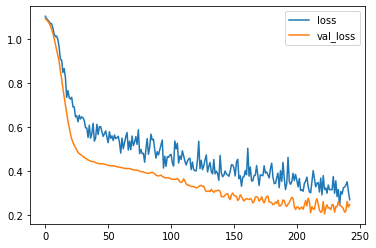

In [15]:
# loss analysis
model_loss = pd.DataFrame( model.history.history )
model_loss[['loss', 'val_loss']].plot()

<br>

## b. Confusion Matrix

In [16]:
# prediction on test set
predictions = model.predict(X_test)

In [17]:
# calculationg confusion matrix
from sklearn.metrics import confusion_matrix
confusionMat = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

Text(51.0, 0.5, 'Actual Class')

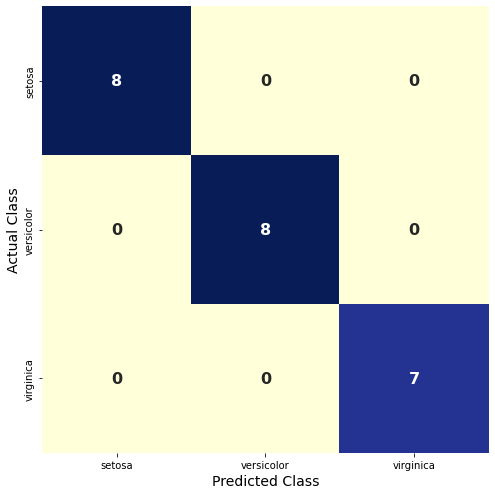

In [18]:
# plotting heatmap of confusion matrix
plt.figure(figsize=(8,9))

sns.heatmap(confusionMat, square=True, fmt='d', 
            cbar=False, cmap='YlGnBu',  
            xticklabels=targetNames,
            yticklabels=targetNames,
            annot=True,
            annot_kws={
                "fontsize":16,
                'fontweight': 'bold',
                },
          )

plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)

<br>

## c. Prediction on New Data

**Creating data**

In [19]:
# defining data position
pos = 109

# collecting data from dataframe - df
new_data = df.iloc[pos]

# reshaping the data
new_data = new_data.values.reshape(-1, 4)

# scaling the data using scaler()
new_data = scaler.transform( new_data )

# extracting true result
true_result_list = target[pos]
true_result = int( np.argmax(true_result_list) )

<br>

**Predicting Class for Created Data**

In [20]:
# predicting result for new_data
predicted_result = model.predict(new_data)

# extracting the maximum predicted calss
predicted_result = int( np.argmax(predicted_result, axis=1) )

<br>

**Extracting Class name**

In [21]:
# extracting predicted class name
predicted_class_name = targetNames[predicted_result]
print(f"\n The predicted class is : '{predicted_class_name}'")

# extracting actual class name
true_class_name = targetNames[true_result]
print(f"\n The actual class is : '{true_class_name}'")


 The predicted class is : 'virginica'

 The actual class is : 'virginica'


<br>
<br>

---

<br>

# Save the model


```
# defining the name of the model
modelName = 'model.h5'

# creating the path
path = 'model_directory/' + modelName

# save model
model.save( path )
```



<br>

# Load the model


```
# defining the name of the model
modelName = 'model.h5'

# creating the path
path = 'model_directory/' + modelName

# loading saved models
from tensorflow.keras.models import load_model
model = load_model( path )
```

